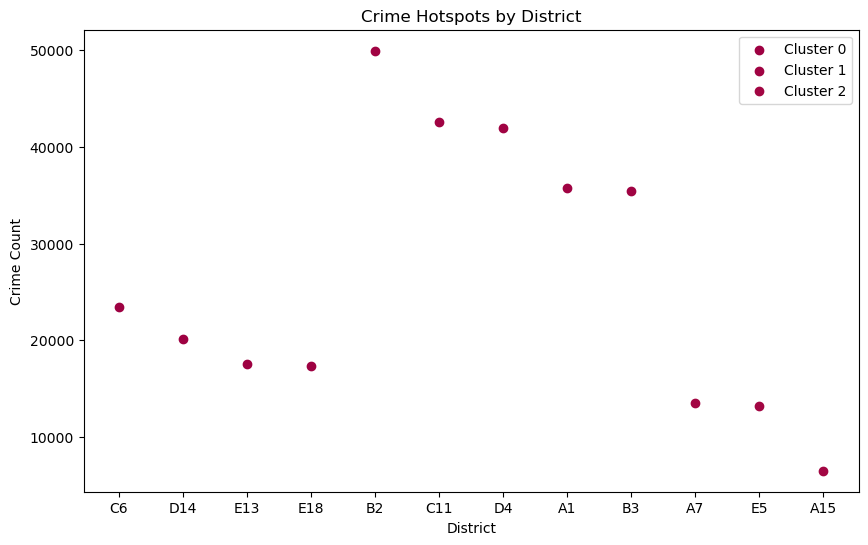

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset with error handling for encoding issues
try:
    data = pd.read_csv('crime.csv', encoding='utf-8')
except UnicodeDecodeError:
    data = pd.read_csv('crime.csv', encoding='latin1')

# Drop rows with missing values
data = data.dropna(subset=['DISTRICT'])

# Count the number of crimes in each district
district_crime_counts = data['DISTRICT'].value_counts().reset_index()
district_crime_counts.columns = ['DISTRICT', 'crime_count']

# Determine the number of clusters (for example, 3)
num_clusters = 3

# Apply K-means
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(district_crime_counts[['crime_count']])
labels = kmeans.labels_

# Add cluster labels to the district crime counts
district_crime_counts['cluster'] = labels

# Plot the clusters
def plot_clusters(district_crime_counts):
    plt.figure(figsize=(10, 6))
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each) for each in range(len(unique_labels))]

    for k, col in zip(unique_labels, colors):
        class_member_mask = (labels == k)
        xy = district_crime_counts[class_member_mask]

        plt.scatter(xy['DISTRICT'], xy['crime_count'], color=tuple(col), label=f'Cluster {k}')

    plt.title('Crime Hotspots by District')
    plt.xlabel('District')
    plt.ylabel('Crime Count')
    plt.legend()
    plt.show()

# Plot the clusters
plot_clusters(district_crime_counts)


   DISTRICT  CrimeRate
0        A1      35717
1       A15       6505
2        A7      13544
3        B2      49945
4        B3      35442
5       C11      42530
6        C6      23460
7       D14      20127
8        D4      41915
9       E13      17536
10      E18      17348
11       E5      13239
  District  CrimeRate
0        A      20127
1        B      42530
2        C      41915
3        D      35442
4        E      17536


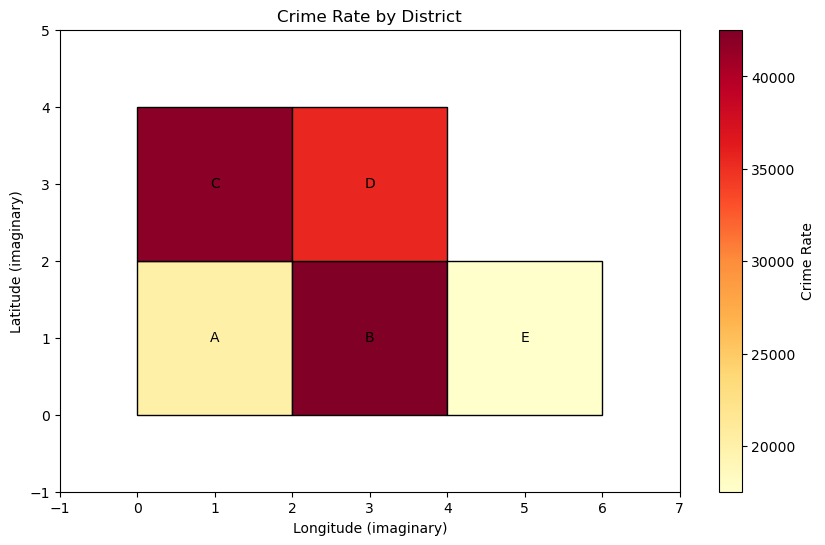

In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv('crime.csv', encoding='latin1')

# Display the first few rows of the dataframe to ensure it loaded correctly
df.head()

# Calculate crime rates by district
crime_rate_by_district = df.groupby('DISTRICT').size().reset_index(name='CrimeRate')

# Display the aggregated crime rates
print(crime_rate_by_district)

import matplotlib.pyplot as plt
import numpy as np

# Define coordinates for the districts (example coordinates)
districts = {
    'A': [(0, 0), (2, 0), (2, 2), (0, 2)],
    'B': [(2, 0), (4, 0), (4, 2), (2, 2)],
    'C': [(0, 2), (2, 2), (2, 4), (0, 4)],
    'D': [(2, 2), (4, 2), (4, 4), (2, 4)],
    'E': [(4, 0), (6, 0), (6, 2), (4, 2)]
}

# Map district labels to match your imaginary districts
district_map = {
    'A': 'D14',  # Example mapping, replace with actual mappings
    'B': 'C11',
    'C': 'D4',
    'D': 'B3',
    'E': 'E13'
}

# Create a new DataFrame with the imaginary district labels
crime_rate_data = pd.DataFrame({
    'District': list(district_map.keys()),
    'CrimeRate': [crime_rate_by_district[crime_rate_by_district['DISTRICT'] == district_code]['CrimeRate'].values[0] for district_code in district_map.values()]
})

print(crime_rate_data)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Define a colormap
cmap = plt.get_cmap('YlOrRd')
norm = plt.Normalize(crime_rate_data['CrimeRate'].min(), crime_rate_data['CrimeRate'].max())

# Plot each district
for district, coords in districts.items():
    crime_rate = crime_rate_data[crime_rate_data['District'] == district]['CrimeRate'].values[0]
    polygon = plt.Polygon(coords, edgecolor='k', facecolor=cmap(norm(crime_rate)))
    ax.add_patch(polygon)
    # Calculate the centroid for placing the text
    centroid = np.mean(coords, axis=0)
    plt.text(centroid[0], centroid[1], district, ha='center', va='center', color='black')

# Add a color bar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Crime Rate')

# Set axis limits and titles
ax.set_xlim(-1, 7)
ax.set_ylim(-1, 5)
ax.set_title('Crime Rate by District')
ax.set_xlabel('Longitude (imaginary)')
ax.set_ylabel('Latitude (imaginary)')

plt.show()


        District  CrimeRate
0   Yishun North        100
1   Yishun South        150
2    Yishun East         80
3    Yishun West         90
4  Lower Seletar        120


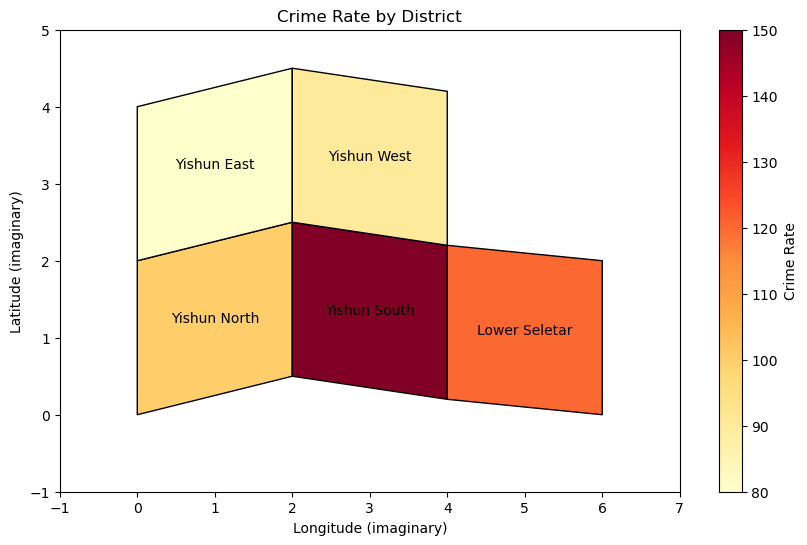

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define irregular coordinates for the districts
districts = {
    'Yishun North': [(0, 0), (2, 0.5), (2, 2.5), (0, 2)],
    'Yishun South': [(2, 0.5), (4, 0.2), (4, 2.2), (2, 2.5)],
    'Yishun East': [(0, 2), (2, 2.5), (2, 4.5), (0, 4)],
    'Yishun West': [(2, 2.5), (4, 2.2), (4, 4.2), (2, 4.5)],
    'Lower Seletar': [(4, 0.2), (6, 0), (6, 2), (4, 2.2)]
}

# Example crime rate data
crime_rate_by_district = pd.DataFrame({
    'DISTRICT': ['D14', 'C11', 'D4', 'B3', 'E13'],
    'CrimeRate': [100, 150, 80, 90, 120]
})

# Map district labels to match your imaginary districts
district_map = {
    'Yishun North': 'D14',  # Example mapping, replace with actual mappings
    'Yishun South': 'C11',
    'Yishun East': 'D4',
    'Yishun West': 'B3',
    'Lower Seletar': 'E13'
}

# Create a new DataFrame with the imaginary district labels
crime_rate_data = pd.DataFrame({
    'District': list(district_map.keys()),
    'CrimeRate': [crime_rate_by_district[crime_rate_by_district['DISTRICT'] == district_code]['CrimeRate'].values[0] for district_code in district_map.values()]
})

print(crime_rate_data)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Define a colormap
cmap = plt.get_cmap('YlOrRd')
norm = plt.Normalize(crime_rate_data['CrimeRate'].min(), crime_rate_data['CrimeRate'].max())

# Plot each district
for district, coords in districts.items():
    crime_rate = crime_rate_data[crime_rate_data['District'] == district]['CrimeRate'].values[0]
    polygon = plt.Polygon(coords, edgecolor='k', facecolor=cmap(norm(crime_rate)))
    ax.add_patch(polygon)
    # Calculate the centroid for placing the text
    centroid = np.mean(coords, axis=0)
    plt.text(centroid[0], centroid[1], district, ha='center', va='center', color='black')

# Add a color bar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Crime Rate')

# Set axis limits and titles
ax.set_xlim(-1, 7)
ax.set_ylim(-1, 5)
ax.set_title('Crime Rate by District')
ax.set_xlabel('Longitude (imaginary)')
ax.set_ylabel('Latitude (imaginary)')

plt.show()

